## TASK 46 - IMAGE PROCESSING

Hemant Thapa

### IMPORTING LIBRARIES

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
import tensorflow
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### LOADING DATASET

MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms. MNIST is short for Modified National Institute of Standards and Technology database. MNIST contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.

In [6]:
from keras.datasets import mnist

### TRAIN AND TEST IN KERAS 

In [7]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

### TRAIN AND TEST IN KERAS

In [8]:
print('X_train: ' + str(train_X.shape))

X_train: (60000, 28, 28)


In [9]:
print('Y_train: ' + str(train_y.shape))

Y_train: (60000,)


In [10]:
print('X_test:  '  + str(test_X.shape))

X_test:  (10000, 28, 28)


In [11]:
print('Y_test:  '  + str(test_y.shape))

Y_test:  (10000,)


In [12]:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)

In [13]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [36]:
#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


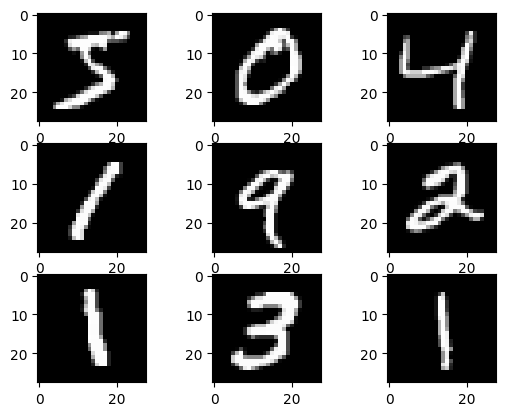

In [34]:
# Define the number of subplots to create
num_subplots = 9

# Loop through the images in the `train_X` dataset
for i in range(num_subplots):
    # Create a subplot
    plt.subplot(330 + 1 + i)
    
    # Display the image in the subplot
    plt.imshow(train_X[i], cmap=plt.cm.gray)

# Show the plot
plt.show()


### 1. LOADING MNIST DATASET

In [19]:
mnist = fetch_openml(name="mnist_784")
X, y = mnist["data"], mnist["target"]

### 2. SPLITING DATA INTO TRAINING, DVELOPMENT AND TEST SET.

The test_size parameter is set to 0.2, meaning that 20% of the data will be used for testing, and the remaining 80% will be used for training. The random_state parameter is set to 42 to ensure that the split is deterministic. 

In [20]:
# Split the data into training, development, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

The development features are stored in the X_dev variable, and the development labels are stored in the y_dev variable.

### 3. RANDOM FOREST CLASSIFIER

In [21]:
# Train a Random Forest Classifier on the training data
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4. PICKING PARAMETER TO TUNE

There are many parameters that can be tuned for a Random Forest Classifier, such as the number of trees in the forest, the maximum depth of the trees, etc.  The purpose of this tuning is to find the best value of n_estimators that optimizes the performance of the model on the test data.

In [37]:
# Tune a parameter, e.g., the number of trees in the forest (n_estimators)
# Choose a value for the parameter to set for testing on the test data

'''The first two lines initialize the variables best_n_estimators and best_score to None and 0, 
respectively. These variables will be used to keep track of the best value of n_estimators 
and its corresponding performance score that the code finds in the loop.'''

best_n_estimators = None
best_score = 0

#we are using 10, 50, 100, 250 and 500 comparision best n_estimators
'''The loop then goes over a list of possible values for n_estimators, 
which are [10, 50, 100, 250, 500]. a new Random Forest classifier is created with n_estimators 
set to the current value, and fit on the development data X_dev and y_dev'''

'''The performance of this classifier on the test data is then evaluated using the score method, 
which returns the mean accuracy of the classifier. 

If the current score is greater than the best score so far, 
the current value of n_estimators is stored in best_n_estimators 
and the current score is stored in best_score.'''
for n_estimators in [10, 50, 100, 250, 500]:
    model_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model_clf.fit(X_dev, y_dev)
    score = model_clf.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_n_estimators = n_estimators
        
'''after the complete process of above code, best_n_estimators contain the best value of n_estimators 
that was found, and best_score will contain the corresponding performance score.'''

'after the complete process of above code, best_n_estimators contain the best value of n_estimators \nthat was found, and best_score will contain the corresponding performance score.'

Random Forest Classifier has several parameters that can be tuned. One of these parameters is the number of trees in the forest (n_estimators). This parameter defines the number of decision trees in the ensemble. By increasing the number of trees, we can reduce the variance in the model, making it less prone to overfitting.

Increasing the number of trees, however, raises the computational cost of training the model. Finding the right balance between the number of trees and the model's accuracy is thus critical. We chose to tune the n estimators parameter in this instance because it is one of the most important parameters in a Random Forest Classifier and has a significant impact on the model's performance.

In [38]:
print(f'Value for n_estimator: {best_n_estimators}')

Value for n_estimator: 500


In [39]:
# Use the best number of trees in the forest for testing
clf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
clf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

The random_state parameter is a seed value used to initialize the random number generator, and is used to ensure reproducibility of results across different runs of the code

By setting the random_state to 42, the classifier will always produce the same results each time the code is run, making it easier to compare results between different runs of the code. 

In [40]:
# Evaluate the model on the test data
y_pred = clf_model.predict(X_test)

In [41]:
y_pred.shape

(14000,)

In [42]:
y_pred[:100]

array(['8', '4', '8', '7', '7', '0', '6', '2', '7', '4', '3', '9', '9',
       '8', '2', '5', '9', '1', '7', '8', '0', '0', '0', '3', '6', '3',
       '6', '1', '6', '9', '7', '6', '0', '8', '5', '5', '2', '9', '1',
       '6', '4', '9', '7', '7', '4', '5', '2', '7', '3', '4', '2', '0',
       '6', '8', '5', '3', '1', '4', '0', '7', '1', '7', '5', '3', '9',
       '5', '7', '9', '6', '0', '1', '7', '3', '0', '4', '3', '4', '3',
       '5', '6', '6', '6', '8', '2', '7', '1', '1', '3', '8', '8', '7',
       '5', '1', '8', '2', '0', '8', '7', '3', '0'], dtype=object)

In [43]:
# Print the confusion matrix for your Random Forest model on the test set
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print()
print(cm)

Confusion Matrix:

[[1321    0    5    0    2    2    2    1    9    1]
 [   0 1578    6    7    2    0    0    4    2    1]
 [   3    3 1339    4    5    1    9    7    8    1]
 [   1    0   24 1361    0   11    2   12   13    9]
 [   1    0    4    0 1255    0    4    3    2   26]
 [   3    2    2   18    3 1226    6    1    9    3]
 [   4    1    0    0    4   10 1374    0    3    0]
 [   2    6   19    0    5    1    0 1448    6   16]
 [   0    7   10   16    5    5    6    6 1293    9]
 [   6    7    4   16   18    3    1   12    8 1345]]


#### The confusion matrix is a table that shows the number of correct and incorrect predictions made by the model. This can give you insight into which classes the model struggles with the most.

This is a 10x10 confusion matrix for a multi-class classification problem with 10 classes. Each row represents the instances in a predicted class, while each column represents the instances in an actual class. The entries in the matrix show the number of instances that were predicted to belong to a particular class, but actually belong to another class.

The confusion matrix provides valuable information for evaluating the performance of a classifier, such as accuracy, precision, recall, and F1 score. These metrics can be computed from the values in the confusion matrix and used to compare different models and evaluate their performance.

In [44]:
# Report the accuracy, precision, recall, and F1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

The code calculates four evaluation metrics for a multi-class classification problem: accuracy, precision, recall, and F1-score. These metrics are used to measure the performance of the classification model and determine how well it is able to correctly predict the class labels.

In [45]:
#Printing result
print(f"Accuracy: {acc * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")

Accuracy: 96.71%
Precision: 96.72%
